In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('city_day.csv')

In [15]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [16]:
# Drop rows with missing AQI or AQI_Bucket
df = df.dropna(subset=['AQI', 'AQI_Bucket'])

# Select relevant features (pollutants)
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']

# Fill missing pollutant values with median
for col in pollutants:
    df[col].fillna(df[col].median(), inplace=True)

# Encode target variable
label_encoder = LabelEncoder()
df['AQI_Bucket_Encoded'] = label_encoder.fit_transform(df['AQI_Bucket'])

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df[pollutants])
y = df['AQI_Bucket_Encoded']


<ipython-input-16-fff7dd4db5ba>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-16-fff7dd4db5ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-16-fff7dd4db5ba>:13: SettingWithCopyWarning: 
A value is trying to be set 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

        Good       0.85      0.65      0.74       282
    Moderate       0.81      0.86      0.84      1745
        Poor       0.69      0.64      0.66       555
Satisfactory       0.85      0.86      0.85      1655
      Severe       0.85      0.79      0.82       271
   Very Poor       0.76      0.74      0.75       462

    accuracy                           0.81      4970
   macro avg       0.80      0.76      0.78      4970
weighted avg       0.81      0.81      0.81      4970



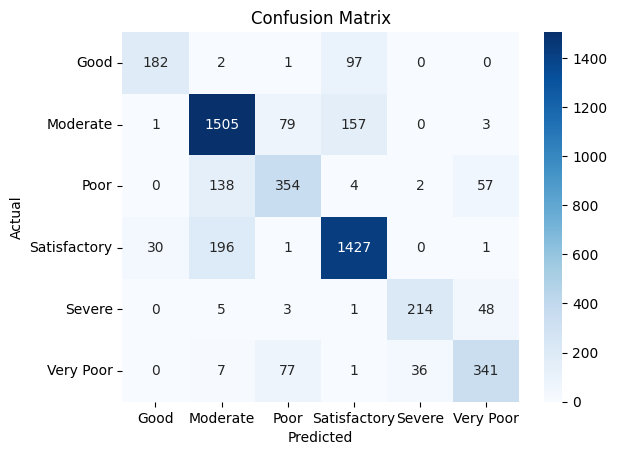

In [20]:
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


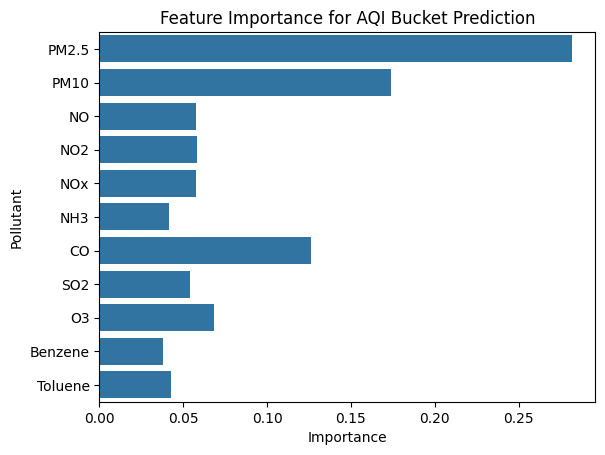

In [21]:
importances = model.feature_importances_
feature_names = df[pollutants].columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for AQI Bucket Prediction')
plt.xlabel('Importance')
plt.ylabel('Pollutant')
plt.show()
